In [2]:
# PCA 클래스
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #  PCA클래스 객체를 만들 때는 n_components 매개변수에 주성분의 개수를 지정해야함
pca.fit(fruits_2d) # 비지도 학습이기에 타깃데이터 필요하지 않음

PCA(n_components=50)

In [28]:
print(pca.components_.shape) # n_components=50으로 지정했기에 첫번째 차원이 50

(50, 10000)


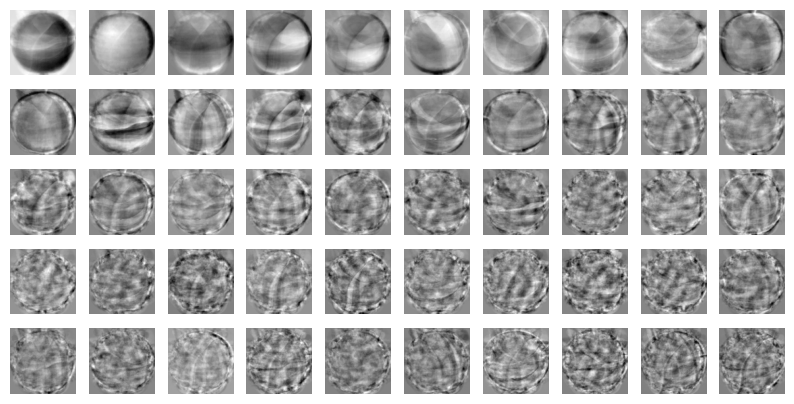

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # n은 샘플의 개수
    n =len(arr)
    # 한줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수르 계산함
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개 까지 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [29]:
fruits_pca = pca.transform(fruits_2d) # 원본 데이터 차원을 50으로 줄이기
print(fruits_pca.shape)

(300, 50)


In [10]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


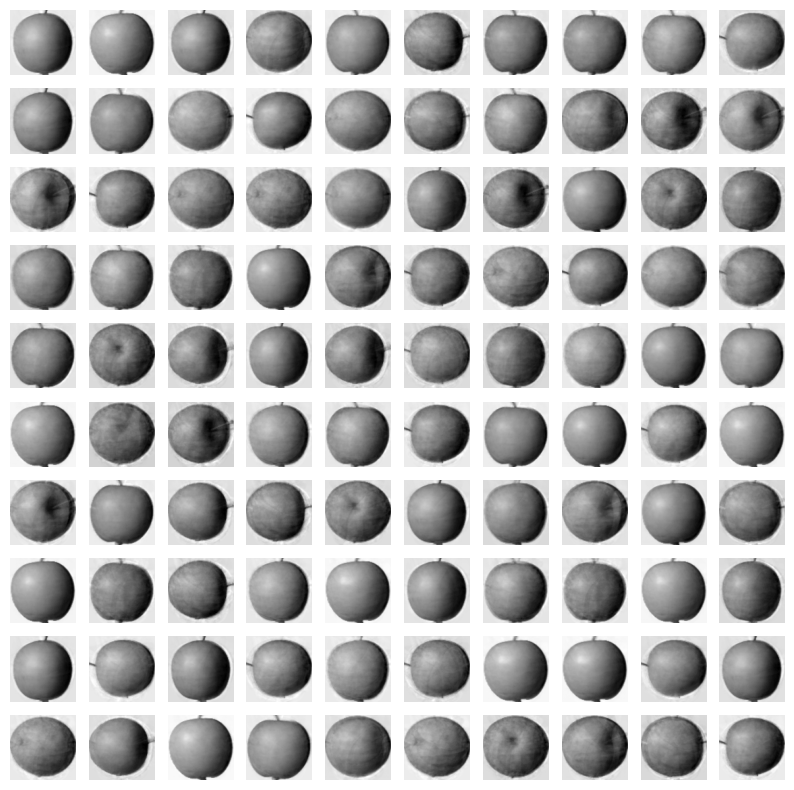

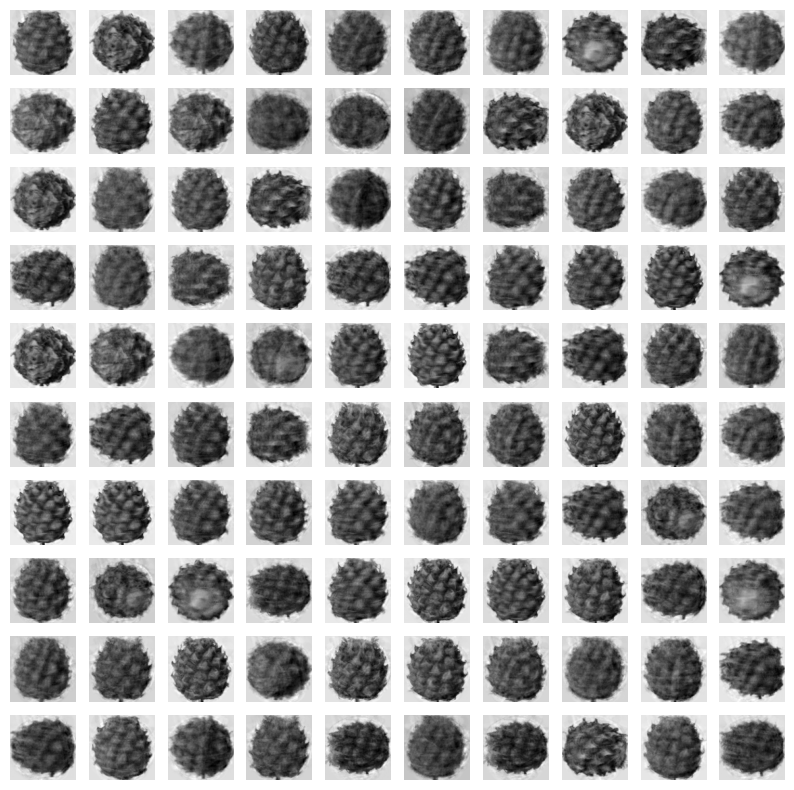

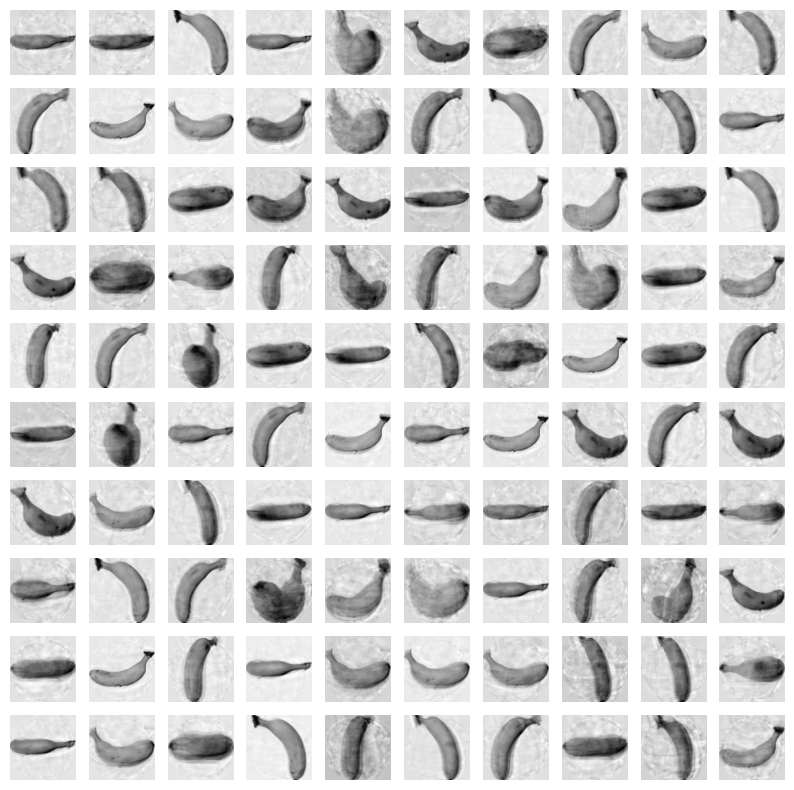

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [12]:
# 설명된 분산
print(np.sum(pca.explained_variance_ratio_))

0.9215777023842263


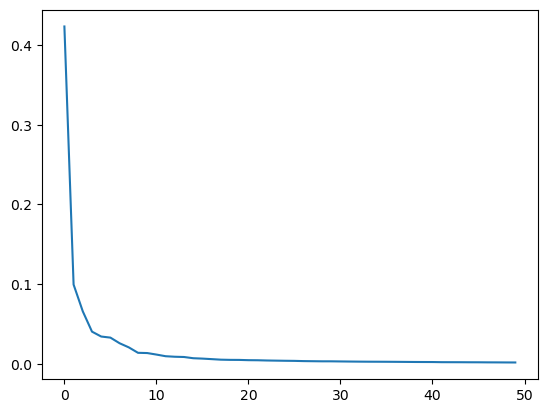

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [30]:
# 다른 알고리즘과 함께 사용하기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 사용

lr = LogisticRegression()

In [31]:
target = np.array([0]*100 + [1]*100 + [2]*100) # 타깃데이터 지정

In [33]:
from sklearn.model_selection import cross_validate # 교차 검증
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 각 교차검증 폴드의 훈련 시간

0.9966666666666667
0.11964969635009766


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.0051213264465332035


In [34]:
pca = PCA(n_components=0.5) # 원하는 설명된 분산의 비율을 매개변수에 입력할 수 있음
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
print(pca.n_components_)

2


In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.00725851058959961


/Users/chungseong-yun/miniconda3/envs/study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chungseong-yun/miniconda3/envs/study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [35]:
from sklearn.cluster import KMeans # k-평균 알고리즘
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


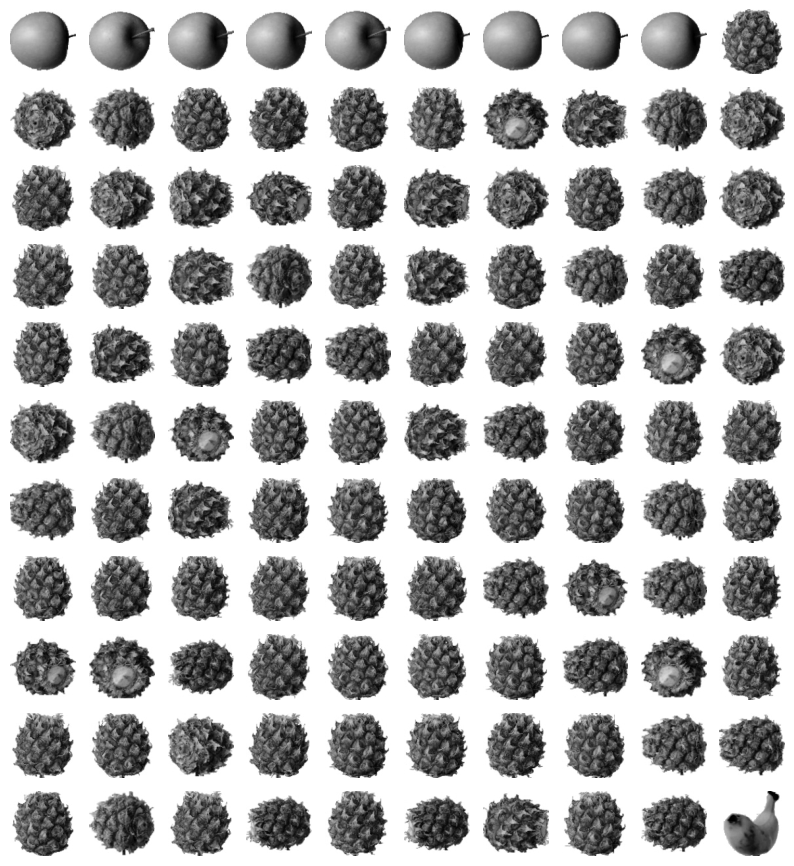

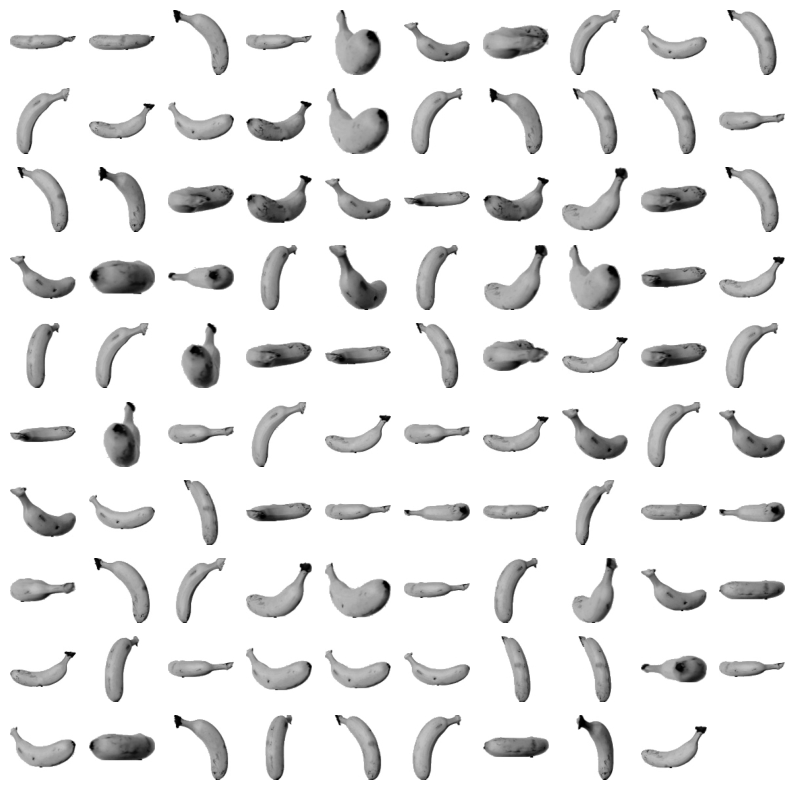

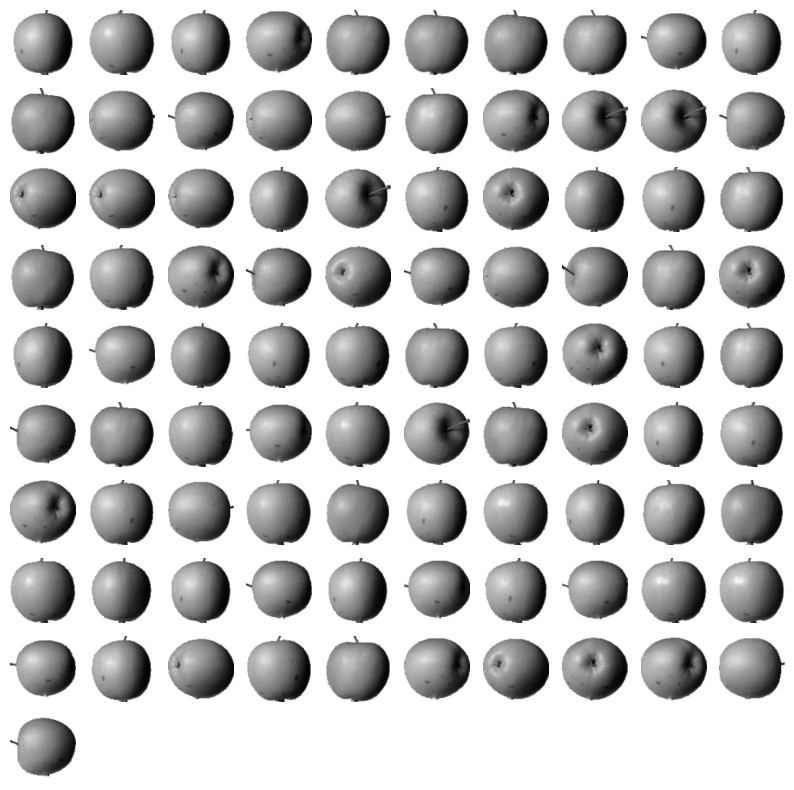

In [25]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

TypeError: legend only accepts two non-keyword arguments

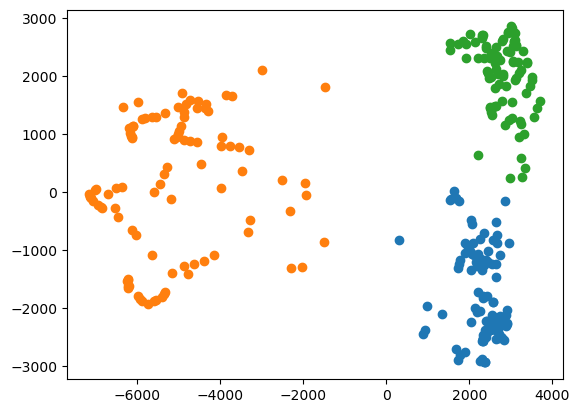

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend('apple', 'banana', 'pineapple')
plt.show()